In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d jangedoo/utkface-new

 98% 323M/331M [00:02<00:00, 177MB/s]
100% 331M/331M [00:02<00:00, 146MB/s]


In [ ]:
!unzip '/content/utkface-new.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import os

os.mkdir('/tmp/train/')
os.mkdir('/tmp/validation/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, validation, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for j in val_files:
    j_file = source + j
    destination = validation + j
    copyfile(j_file, destination)

train_ratio = 0.9

source_dir = '/content/UTKFace/'
train_dir = '/tmp/train/'
val_dir = '/tmp/validation/'
train_val_split(source_dir, train_dir, val_dir, train_ratio)

In [ ]:
print('Jumlah Semua Bahan Face :', len(os.listdir(source_dir)))
print('Jumlah Train Face :', len(os.listdir(train_dir)))
print('Jumlah Validation Face :', len(os.listdir(val_dir)))

Jumlah Semua Bahan Face : 23708
Jumlah Train Face : 21337
Jumlah Validation Face : 2371


In [ ]:
from tqdm.notebook import tqdm

image_paths_train = []
age_labels_train = []
gender_labels_train = []

for filename in tqdm(os.listdir(train_dir)):
    image_path = os.path.join(train_dir, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths_train.append(image_path)
    age_labels_train.append(age)
    gender_labels_train.append(gender)

  0%|          | 0/21337 [00:00<?, ?it/s]

In [ ]:
image_paths_val = []
age_labels_val = []
gender_labels_val = []

for filename in tqdm(os.listdir(val_dir)):
    image_path = os.path.join(val_dir, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths_val.append(image_path)
    age_labels_val.append(age)
    gender_labels_val.append(gender)

  0%|          | 0/2371 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths_train, age_labels_train, gender_labels_train
df.head()

,image,age,gender
0,/tmp/train/22_1_2_20170116172741591.jpg.chip.jpg,22,1
1,/tmp/train/16_0_0_20170110231647962.jpg.chip.jpg,16,0
2,/tmp/train/18_0_4_20170103201305015.jpg.chip.jpg,18,0
3,/tmp/train/60_0_0_20170116224754077.jpg.chip.jpg,60,0
4,/tmp/train/60_0_0_20170120223345579.jpg.chip.jpg,60,0


In [ ]:
df1 = pd.DataFrame()
df1['image_val'], df1['age_val'], df1['gender_val'] = image_paths_val, age_labels_val, gender_labels_val
df1.head()

,image_val,age_val,gender_val
0,/tmp/validation/28_1_0_20170116222126409.jpg.c...,28,1
1,/tmp/validation/82_0_2_20170112205224683.jpg.c...,82,0
2,/tmp/validation/40_0_0_20170117154530911.jpg.c...,40,0
3,/tmp/validation/10_0_0_20170110220316298.jpg.c...,10,0
4,/tmp/validation/73_0_0_20170117192346540.jpg.c...,73,0


In [ ]:
#Map Labels untuk Gender dan Age

gender_dict = {0:'Laki-Laki', 1:'Perempuan'}
age_dict = {1:'Anak-anak/Remaja', 2:'Anak-anak/Remaja', 3:'Anak-anak/Remaja', 4:'Anak-anak/Remaja', 5:'Anak-anak/Remaja',
            6:'Anak-anak/Remaja', 7:'Anak-anak/Remaja', 8:'Anak-anak/Remaja', 9:'Anak-anak/Remaja', 10:'Anak-anak/Remaja',
            11:'Anak-anak/Remaja', 12:'Anak-anak/Remaja', 13:'Anak-anak/Remaja', 14:'Anak-anak/Remaja', 15:'Anak-anak/Remaja',
            16:'Anak-anak/Remaja', 17:'Anak-anak/Remaja', 18:'Anak-anak/Remaja', 19:'Dewasa', 20:'Dewasa',
            21:'Dewasa', 22:'Dewasa', 23:'Dewasa', 24:'Dewasa', 25:'Dewasa',
            26:'Dewasa', 27:'Dewasa', 28:'Dewasa', 29:'Dewasa', 30:'Dewasa',
            31:'Dewasa', 32:'Dewasa', 33:'Dewasa', 34:'Dewasa', 35:'Dewasa',
            36:'Dewasa', 37:'Dewasa', 38:'Dewasa', 39:'Dewasa', 40:'Dewasa',
            41:'Dewasa', 42:'Dewasa', 43:'Dewasa', 44:'Dewasa', 45:'Dewasa',
            46:'Dewasa', 47:'Dewasa', 48:'Dewasa', 49:'Dewasa', 50:'Dewasa',
            51:'Dewasa', 52:'Dewasa', 53:'Dewasa', 54:'Dewasa', 55:'Dewasa',
            56:'Dewasa', 57:'Dewasa', 58:'Dewasa', 59:'Dewasa', 60:'Dewasa',
            61:'Dewasa', 62:'Dewasa', 63:'Dewasa', 64:'Dewasa', 65:'Dewasa',
            66:'Dewasa', 67:'Dewasa', 68:'Dewasa', 69:'Dewasa', 70:'Dewasa',
            71:'Dewasa', 72:'Dewasa', 73:'Dewasa', 74:'Dewasa', 75:'Dewasa',
            76:'Dewasa', 77:'Dewasa', 78:'Dewasa', 79:'Dewasa', 80:'Dewasa',
            }

In [ ]:
from PIL import Image
from keras.preprocessing.image import load_img

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
import numpy as np
x_train = extract_features(df['image'])
x_val = extract_features(df1['image_val'])
x_train = x_train/255.0
x_val = x_val/255.0

y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_gender_val = np.array(df1['gender_val'])
y_age_val = np.array(df1['age_val'])
input_shape = (128, 128, 1)

  0%|          | 0/21337 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/2371 [00:00<?, ?it/s]

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
#conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
#maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

#flatten = Flatten() (maxp_4)
flatten = Flatten() (maxp_3)

# fully connected layers
#dense_1 = Dense(256, activation='relu') (flatten)
#dense_2 = Dense(256, activation='relu') (flatten)
dense_1 = Dense(128, activation='relu') (flatten)
dense_2 = Dense(128, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train, y=[y_gender, y_age], batch_size=32, epochs=20, steps_per_epoch = 200, validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 203s 1s/step - loss: 17.1622 - gender_out_loss: 0.7078 - age_out_loss: 16.4544 - gender_out_accuracy: 0.5252 - age_out_accuracy: 0.0486 - val_loss: 15.1739 - val_gender_out_loss: 0.6873 - val_age_out_loss: 14.4866 - val_gender_out_accuracy: 0.5305 - val_age_out_accuracy: 0.0459
Epoch 2/20
200/200 [==============================] - 203s 1s/step - loss: 13.7686 - gender_out_loss: 0.5990 - age_out_loss: 13.1696 - gender_out_accuracy: 0.6611 - age_out_accuracy: 0.0489 - val_loss: 11.8416 - val_gender_out_loss: 0.5115 - val_age_out_loss: 11.3301 - val_gender_out_accuracy: 0.7570 - val_age_out_accuracy: 0.0429
Epoch 3/20
200/200 [==============================] - 202s 1s/step - loss: 11.4448 - gender_out_loss: 0.5025 - age_out_loss: 10.9423 - gender_out_accuracy: 0.7602 - age_out_accuracy: 0.0433 - val_loss: 10.2791 - val_gender_out_loss: 0.4007 - val_age_out_loss: 9.8784 - val_gender_out_accuracy: 0.8236 - val_age_out_accuracy: 0.0358
Ep

In [ ]:
model.evaluate(x=x_val, y=[y_gender_val, y_age_val])

75/75 [==============================] - 16s 213ms/step - loss: 7.2130 - gender_out_loss: 0.2515 - age_out_loss: 6.9616 - gender_out_accuracy: 0.8967 - age_out_accuracy: 0.0443


[7.213039875030518,
 0.2514735758304596,
 6.961565017700195,
 0.8966680765151978,
 0.044285111129283905]

In [ ]:
import tensorflow as tf

# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # YOUR CODE HERE

# Set the optimizations
converter.optimizations = [optimization]# YOUR CODE HERE

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()# YOUR CODE HERE

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

6527216

In [ ]:
!zip -r '/content/saved/model.zip' '/content/saved_model/1/variables'

zip I/O error: No such file or directory
zip error: Could not create output file (/content/saved/model.zip)


In [ ]:
# convert model into tensorflow lite model
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

#save model 
with open("model.tflite","wb") as f:
    f.write(tflite_model)

In [ ]:
model.save('complete_save_model/')

INFO:tensorflow:Assets written to: complete_save_model/assets


Original Gender: Laki-Laki   |  Original Age: 46
Predicted Gender: Laki-Laki   |  Predicted Age: 34


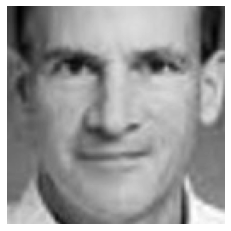

In [ ]:
import matplotlib.pyplot as plt

image_index = 970
print("Original Gender:", gender_dict[y_gender[image_index]], "  |  Original Age:", y_age[image_index])
# predict from model
pred = model.predict(x_train[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "  |  Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(x_train[image_index].reshape(128, 128), cmap='gray');